## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
from tensorflow import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0714 21:30:08.836276  8212 deprecation.py:323] From C:\Users\qwerz\Miniconda3\envs\ML100\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 60us/sample - loss: 2.2704 - accuracy: 0.1550 - val_loss: 2.2232 - val_accuracy: 0.2035
Epoch 2/500
50000/50000 [==============================] - 3s 52us/sample - loss: 2.1909 - accuracy: 0.2209 - val_loss: 2.1613 - val_accuracy: 0.2414
Epoch 3/500
50000/50000 [==============================] - 3s 52us/sample - loss: 2.1360 - accuracy: 0.2511 - val_loss: 2.1126 - val_accuracy: 0.2643
Epoch 4/500
50000/50000 [==============================] - 3s 53us/sample - loss: 2.0920 - accuracy: 0.2697 - val_loss: 2.0724 - val_accuracy: 0.2814
Epoch 5/500
50000/50000 [==============================] - 3s 51us/sample - loss: 2.0547 - accuracy: 0.2827 - val_loss: 2.0378 - val_accuracy: 0.2958
Epoch 6/500
50000/50000 [==============================] - 3s 51us/sample - loss: 2.0226 - accuracy: 0.2943 - val_loss: 2.0087 - val_accuracy: 0.3032
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 4s 73us/sample - loss: 1.6599 - accuracy: 0.4185 - val_loss: 1.6651 - val_accuracy: 0.4217
Epoch 56/500
50000/50000 [==============================] - 4s 76us/sample - loss: 1.6567 - accuracy: 0.4212 - val_loss: 1.6611 - val_accuracy: 0.4199
Epoch 57/500
50000/50000 [==============================] - 4s 78us/sample - loss: 1.6534 - accuracy: 0.4213 - val_loss: 1.6597 - val_accuracy: 0.4187
Epoch 58/500
50000/50000 [==============================] - 4s 79us/sample - loss: 1.6500 - accuracy: 0.4227 - val_loss: 1.6571 - val_accuracy: 0.4239
Epoch 59/500
50000/50000 [==============================] - 4s 73us/sample - loss: 1.6473 - accuracy: 0.4238 - val_loss: 1.6552 - val_accuracy: 0.4233
Epoch 60/500
50000/50000 [==============================] - 4s 81us/sample - loss: 1.6442 - accuracy: 0.4251 - val_loss: 1.6523 - val_accuracy: 0.4251
Epoch 61/500
50000/50000 [==============================] - 4s 81us/sample - loss: 1.6410 - ac

50000/50000 [==============================] - 4s 75us/sample - loss: 1.5231 - accuracy: 0.4702 - val_loss: 1.5455 - val_accuracy: 0.4613
Epoch 110/500
50000/50000 [==============================] - 4s 75us/sample - loss: 1.5210 - accuracy: 0.4700 - val_loss: 1.5456 - val_accuracy: 0.4586
Epoch 111/500
50000/50000 [==============================] - 4s 78us/sample - loss: 1.5192 - accuracy: 0.4713 - val_loss: 1.5440 - val_accuracy: 0.4626
Epoch 112/500
50000/50000 [==============================] - 4s 76us/sample - loss: 1.5172 - accuracy: 0.4727 - val_loss: 1.5485 - val_accuracy: 0.4597
Epoch 113/500
50000/50000 [==============================] - 4s 74us/sample - loss: 1.5152 - accuracy: 0.4722 - val_loss: 1.5421 - val_accuracy: 0.4605
Epoch 114/500
50000/50000 [==============================] - 4s 77us/sample - loss: 1.5133 - accuracy: 0.4731 - val_loss: 1.5384 - val_accuracy: 0.4628
Epoch 115/500
50000/50000 [==============================] - 4s 78us/sample - loss: 1.5111 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 3s 56us/sample - loss: 1.4299 - accuracy: 0.5021 - val_loss: 1.4783 - val_accuracy: 0.4805
Epoch 164/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.4279 - accuracy: 0.5032 - val_loss: 1.4748 - val_accuracy: 0.4809
Epoch 165/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.4267 - accuracy: 0.5028 - val_loss: 1.4773 - val_accuracy: 0.4790
Epoch 166/500
50000/50000 [==============================] - 3s 53us/sample - loss: 1.4250 - accuracy: 0.5034 - val_loss: 1.4750 - val_accuracy: 0.4806
Epoch 167/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.4235 - accuracy: 0.5035 - val_loss: 1.4729 - val_accuracy: 0.4813
Epoch 168/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.4220 - accuracy: 0.5044 - val_loss: 1.4723 - val_accuracy: 0.4817
Epoch 169/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.42

Epoch 217/500
50000/50000 [==============================] - 3s 53us/sample - loss: 1.3527 - accuracy: 0.5283 - val_loss: 1.4382 - val_accuracy: 0.4889
Epoch 218/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.3513 - accuracy: 0.5269 - val_loss: 1.4314 - val_accuracy: 0.4929
Epoch 219/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.3501 - accuracy: 0.5280 - val_loss: 1.4278 - val_accuracy: 0.4943
Epoch 220/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.3487 - accuracy: 0.5288 - val_loss: 1.4293 - val_accuracy: 0.4945
Epoch 221/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.3473 - accuracy: 0.5292 - val_loss: 1.4306 - val_accuracy: 0.4955
Epoch 222/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.3461 - accuracy: 0.5296 - val_loss: 1.4318 - val_accuracy: 0.4967
Epoch 223/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.34

Epoch 271/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.2834 - accuracy: 0.5515 - val_loss: 1.3955 - val_accuracy: 0.5037
Epoch 272/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.2822 - accuracy: 0.5517 - val_loss: 1.4020 - val_accuracy: 0.5045
Epoch 273/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.2815 - accuracy: 0.5516 - val_loss: 1.3922 - val_accuracy: 0.5045
Epoch 274/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.2801 - accuracy: 0.5520 - val_loss: 1.4107 - val_accuracy: 0.4977
Epoch 275/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.2794 - accuracy: 0.5533 - val_loss: 1.3962 - val_accuracy: 0.5036
Epoch 276/500
50000/50000 [==============================] - 3s 50us/sample - loss: 1.2783 - accuracy: 0.5525 - val_loss: 1.3942 - val_accuracy: 0.5059
Epoch 277/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.27

RuntimeError: Error copying tensor to device: CPU:0. GPU sync failed

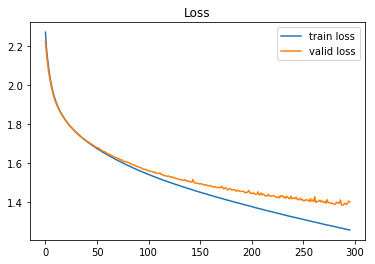

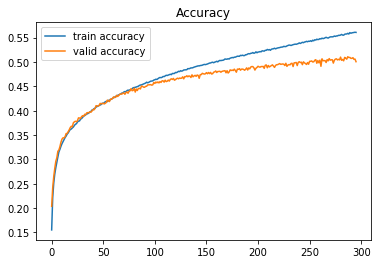

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()